# 739.每日温度

本笔记包含力扣题目 [739.每日温度](https://leetcode.cn/problems/daily-temperatures/) 的求解动画演示代码，动画基于 [algviz](https://github.com/zjl9959/algviz) 算法动画引擎实时在线渲染。

*相关链接：[algviz 官网](https://zjl9959.github.io/algviz)，[algviz 安装方式](https://zjl9959.github.io/algviz/cn/installation.html)，[algviz 使用教程](https://zjl9959.github.io/algviz/cn/examples.html)， [algviz 接口 API 文档](https://algviz.readthedocs.io/en/latest/)。*

## 解题思路

暴力枚举的时间复杂度为 $O(n^2)$，会超时，所以考虑使用单调栈来优化时间复杂度。

我们可以从左向右扫描数组，并使用单调递减栈来记录：（温度值，天数）信息。
为了维护栈的单调递减性，我们需要做如下操作：
+ 如果当前温度大于栈尾部记录的温度，那么依次出栈，直到栈尾温度大于当前温度，最后将当前温度信息入栈；
    + 对于所有出栈的温度记录，当前温度就是对于它来说：下一个更高温度出现的位置，所以在出栈的同时更新结果。
+ 如果当前温度小于栈尾部记录的温度，那么直接将当前温度信息入栈；

### 运行环境

*笔记中的动画使用 [algviz算法动画引擎](https://zjl9959.github.io/algviz/) 渲染，环境配置请参考该链接：[https://zjl9959.github.io/algviz/cn/installation.html](https://zjl9959.github.io/algviz/cn/installation.html)*

*觉得对你有帮忙的话请给👉[algviz开源项目](https://github.com/zjl9959/algviz)👈点个 Star✨，遇到了问题也可以在这里 [报个bug](https://github.com/zjl9959/algviz/issues)！*

In [1]:
import algviz

# Code.S
class Solution(object):
    def dailyTemperatures(self, temperatures):
        viz = algviz.Visualizer(1, layout=True)
        stack = viz.createVector(name='单调递减栈', cell_size=(40, 200), histogram=True)
        stack_index = []
        res = viz.createVector([0 for i in range(len(temperatures))], '下一个更高温度出现在几天后')
        temperatures = viz.createVector(temperatures, name='每日温度', cell_size=(40, 200), histogram=True)
        for i in range(len(temperatures)):
            while len(stack) > 0 and stack[len(stack) - 1] < temperatures[i]:
                temperatures.mark(algviz.cGreenYellow, i, hold=True)
                stack.mark(algviz.cSilver, len(stack) - 1, hold=True)
                viz.display()
                j = stack_index[len(stack) - 1]
                res[j] = i - j                  # 更新结果
                temperatures.mark(algviz.cSilver, j, hold=True)
                res.mark(algviz.cSilver, j, hold=True)
                res.mark(algviz.cTan, j)
                viz.display()
                stack.pop()                     # 弹出小于当前温度的记录
                stack_index.pop()
                viz.display()
                temperatures.removeMark(algviz.cGreenYellow)
            temperatures.mark(algviz.cTomato, i)
            stack.append(temperatures[i])       # 记录当前温度
            stack.mark(algviz.cTomato, len(stack) - 1)
            stack_index.append(i)
            viz.display()
        viz.display(2)
        viz.display(2)
        viz.layout(400)

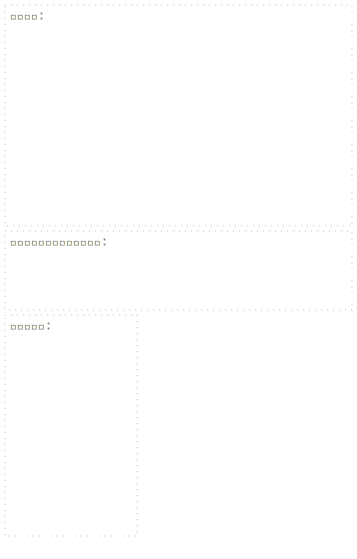

In [2]:
# Case 1
temperatures = [6,7,8,4,2,5,9,6]
Solution().dailyTemperatures(temperatures)